(3 балла) Данное задание выполняется по вариантам. Свой номер вы можете увидеть в
табличке с баллами. Список заданий доступен по ссылке.
Замечание: стоит выполнять толькой свое задание, за него будут ставиться баллы.
Однако если интересно – можете посмотреть и другие.

## Требования:
- Для сдачи домашнего задания используите Google Colab/Github. Ожидается, что ноутбук будет выложен на Github/Colab (не файл .ipynb, присланный куда-либо).
- Для данного домашнего задания можно использовать языки программирования R, Python.
- Задания необходимо выполнять в RMarkdown либо Jupyter Notebook с комментариями и пояснениями.

## Задание

Пусть $x_1, . . . , x_n ∼ U(0, \theta)$. Пусть $\hat θ_n = \overline x +\frac{1}{2}x[n]$ оценка параметра $a$.

• Исследуйте $\hat θ_n$ на (асимптотическую) несмещенность.
• Исследуйте $\hat θ_n$ на состоятельность.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Параметр theta для распределения $U(0, \theta)$

Для удобства расчетов возьмем theta = 1, но метод будет работать для любого $\theta > 0$

In [2]:
theta = 1 

def estimate_theta(samples):
    x_mean = np.mean(samples)
    x_max = np.max(samples)
    theta_hat = x_mean + 0.5 * x_max
    return theta_hat

Проверка асимптотической несмещенности и состоятельности оценки

In [3]:
def check_properties(n_simulations, sample_sizes):
    biases = [] 
    mses = []

    for size in sample_sizes:
        theta_hats = []
        for _ in range(n_simulations):
            samples = np.random.uniform(low=0, high=theta, size=size)
            theta_hat = estimate_theta(samples)
            theta_hats.append(theta_hat)

        theta_hats_array = np.array(theta_hats)

        bias = np.mean(theta_hats_array) - theta
        mse = np.mean((theta_hats_array - theta) ** 2)
        biases.append(bias)
        mses.append(mse)

    return biases, mses

Тестирование:

In [ ]:
n_simulations = 1000
sample_sizes = np.arange(10, 1001, 10) 

biases, consistencies = check_properties(n_simulations, sample_sizes)

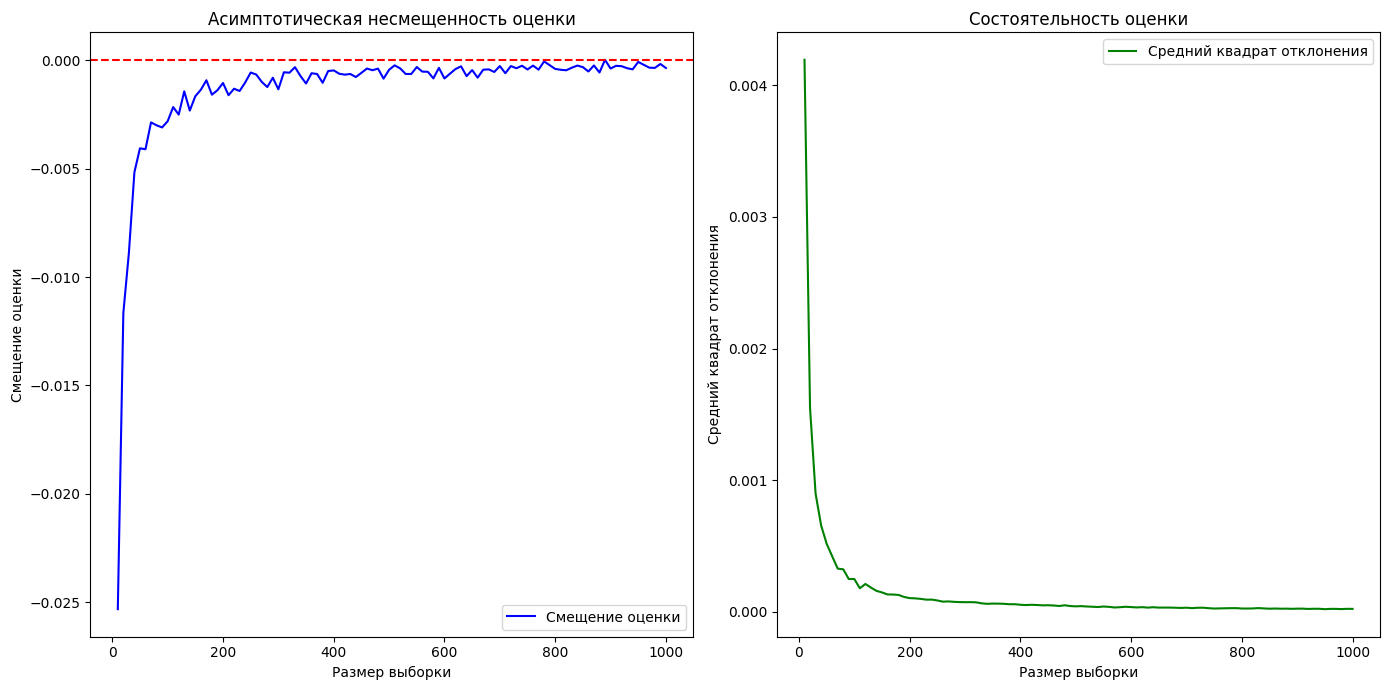

In [4]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(sample_sizes, biases, label='Смещение оценки', color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Асимптотическая несмещенность оценки')
plt.xlabel('Размер выборки')
plt.ylabel('Смещение оценки')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sample_sizes, consistencies, label='Средний квадрат отклонения', color='green')
plt.title('Состоятельность оценки')
plt.xlabel('Размер выборки')
plt.ylabel('Средний квадрат отклонения')
plt.legend()

plt.tight_layout()
plt.show()

Средние значения оценок: [0.48111551202124314, 0.49494044586170693, 0.49685303103882955, 0.4992131397336868, 0.49988665744154476, 0.5000022749817244, 0.5000106551210902]
Дисперсии оценок: [0.003233808572145732, 0.00048252425886664477, 0.00022331923175440338, 4.226911062363618e-05, 2.188151812398449e-05, 3.998489927716229e-06, 2.1257949485645627e-07]


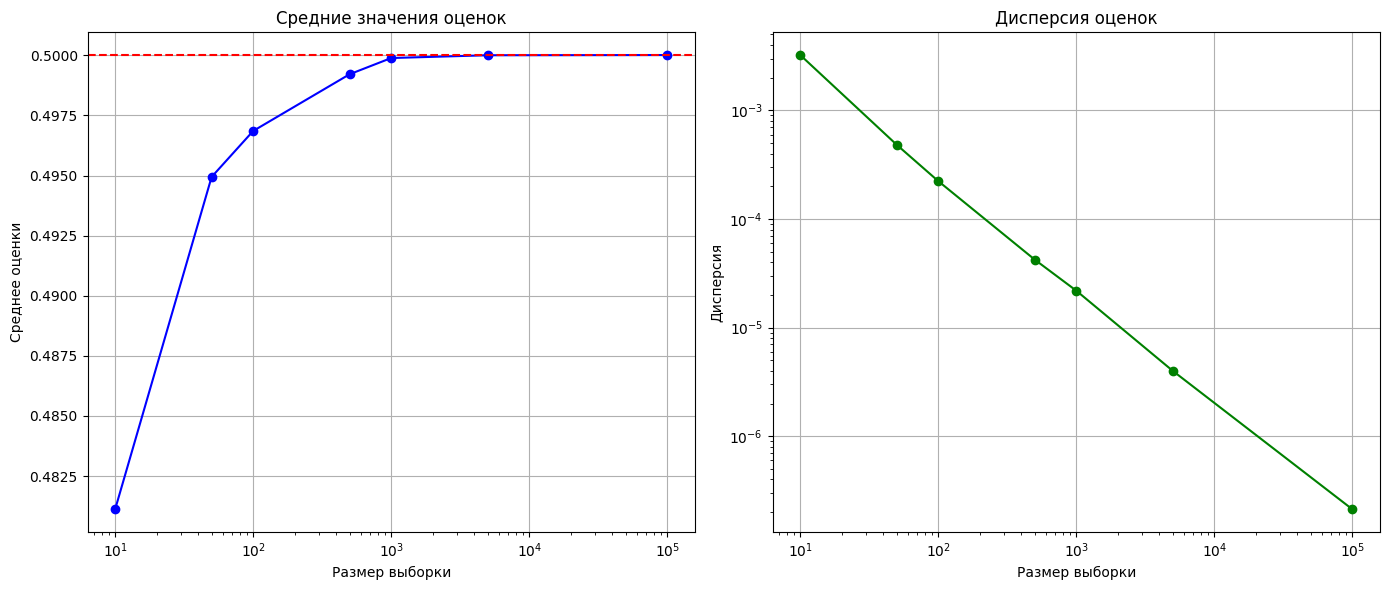

In [5]:
def estimate_theta(n, theta, num_simulations=1000):
    estimates = []
    for _ in range(num_simulations):
        sample = np.random.uniform(0, theta, n)
        theta_hat = np.mean(sample) + 0.5 * np.max(sample)
        estimates.append(theta_hat)
    return estimates

theta = 0.5  # Истинное значение параметра
sample_sizes = [10, 50, 100, 500, 1000, 5000, 100000]  # Разные размеры выборки
means = []  # Список для хранения средних значений оценок
variances = []  # Список для хранения дисперсий оценок

for n in sample_sizes:
    estimates = estimate_theta(n, theta)
    means.append(np.mean(estimates))
    variances.append(np.var(estimates))

print("Средние значения оценок:", means)
print("Дисперсии оценок:", variances)

plt.figure(figsize=(14, 6))

# Средние значения
plt.subplot(1, 2, 1)
plt.plot(sample_sizes, means, marker='o', linestyle='-', color='blue')
plt.axhline(y=theta, color='r', linestyle='--')
plt.title('Средние значения оценок')
plt.xlabel('Размер выборки')
plt.ylabel('Среднее оценки')
plt.xscale('log')
plt.grid(True)

# Дисперсии
plt.subplot(1, 2, 2)
plt.plot(sample_sizes, variances, marker='o', linestyle='-', color='green')
plt.title('Дисперсия оценок')
plt.xlabel('Размер выборки')
plt.ylabel('Дисперсия')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)

plt.tight_layout()
plt.show()